# Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix,
    accuracy_score,
)
from sklearn.inspection import permutation_importance
import warnings


In [ ]:
set_config(transform_output="pandas")
# Suppress all UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)


df = pd.read_excel('../TMT Task datasheet.xlsx')
df.drop_duplicates(inplace=True)
df.head()

,patient_id,avg_point_time_A,avg_force_A,total_length_A,no_lines_A,no_points_A,avg_delay_time_A,no_corners_A,avg_curv_A,duration_a,...,no_corners_B,SSIM-A,SSIM-B,MSE-B,MSE-A,avg_speed_A,avg_speed_B,avg_curv_all_points_A,avg_curv_all_points_B,labels
0,6,0.004428,0.553943,338.446949,3,7497,0.974503,31,0.307627,33.164112,...,31,0.824015,0.762475,3443.245127,2416.337995,315.213839,96.889609,0.708835,0.857724,0
1,20,0.004826,1.832864,350.367109,5,11234,1.850000,28,0.282804,54.193500,...,28,0.847705,0.800252,2819.151094,2120.586400,183.360238,162.392590,0.671569,2.150089,0
2,21,0.004240,2.516199,376.392281,2,10417,0.747000,29,0.627350,44.131700,...,29,0.836129,0.809768,2584.140179,2211.582269,176.770796,85.661936,0.474163,0.611129,1
3,22,0.005631,1.561803,371.107076,5,6295,2.305000,27,0.471448,35.416229,...,27,0.843307,0.781571,3023.530798,2082.423226,336.746507,192.237568,0.436060,1.910259,0
4,24,0.004901,1.672676,344.607991,4,5859,1.434333,30,0.416866,28.676003,...,30,0.815774,0.805214,2612.357171,2399.052799,352.478935,172.228550,0.451495,0.885005,0


# Exploratory Data Analysis

In [ ]:
df.describe()

,patient_id,avg_point_time_A,avg_force_A,total_length_A,no_points_A,avg_delay_time_A,no_corners_A,avg_curv_A,no_errors_a,SSIM-A,avg_curv_all_points_A,labels
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,76.549020,0.004749,1.570625,346.366480,9068.078431,1.196562,33.078431,0.501985,0.156863,0.838028,0.549705,0.392157
std,35.996285,0.000769,0.785933,36.906823,3280.403328,1.168333,5.677475,0.258606,0.418213,0.012053,0.438909,0.493089
min,6.000000,0.004169,0.514640,151.955742,4616.000000,0.000000,26.000000,0.099321,0.000000,0.811493,0.250412,0.000000
25%,47.500000,0.004169,0.981483,339.030323,7057.000000,0.000000,29.000000,0.317844,0.000000,0.831620,0.403125,0.000000
50%,78.000000,0.004461,1.330813,353.317511,8291.000000,1.083667,32.000000,0.484451,0.000000,0.838176,0.474163,0.000000
75%,106.000000,0.004970,1.984398,363.089477,10450.000000,1.611063,34.500000,0.604376,0.000000,0.845327,0.581414,1.000000
max,137.000000,0.008132,3.560880,403.170637,24028.000000,5.036000,54.000000,1.259629,2.000000,0.876327,3.468508,1.000000


<Axes: >

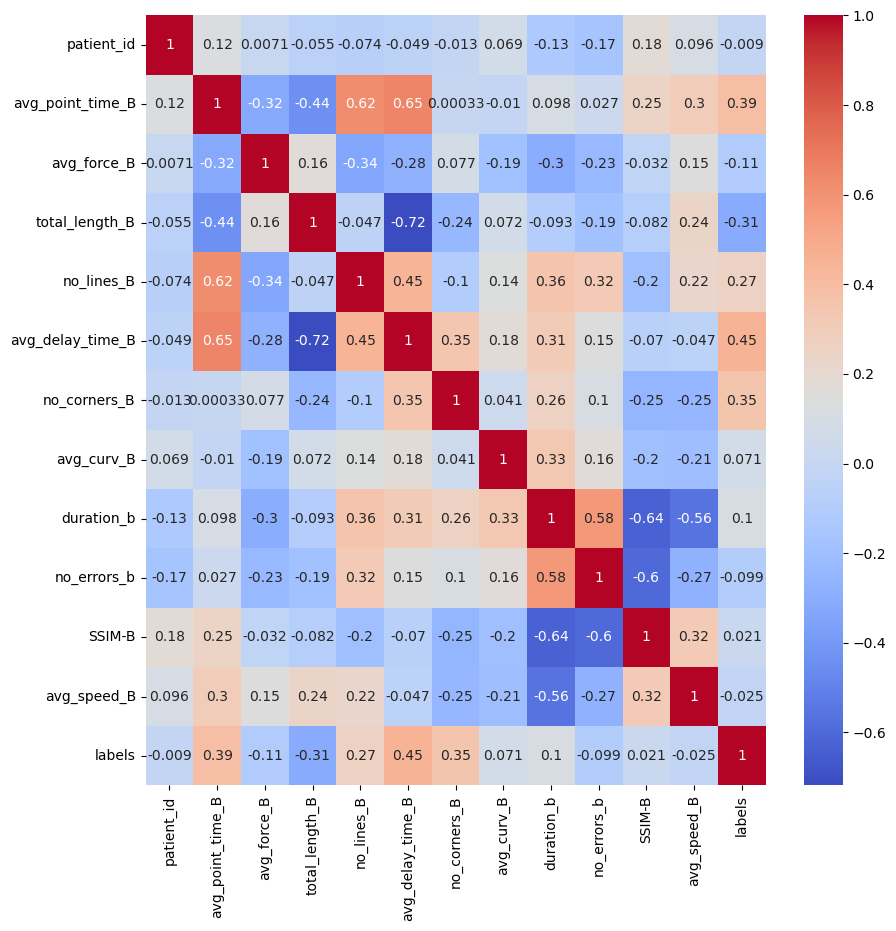

In [102]:
#correlation matrix
df.corr()

#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(tmt_b_data.corr(), annot=True, cmap='coolwarm')



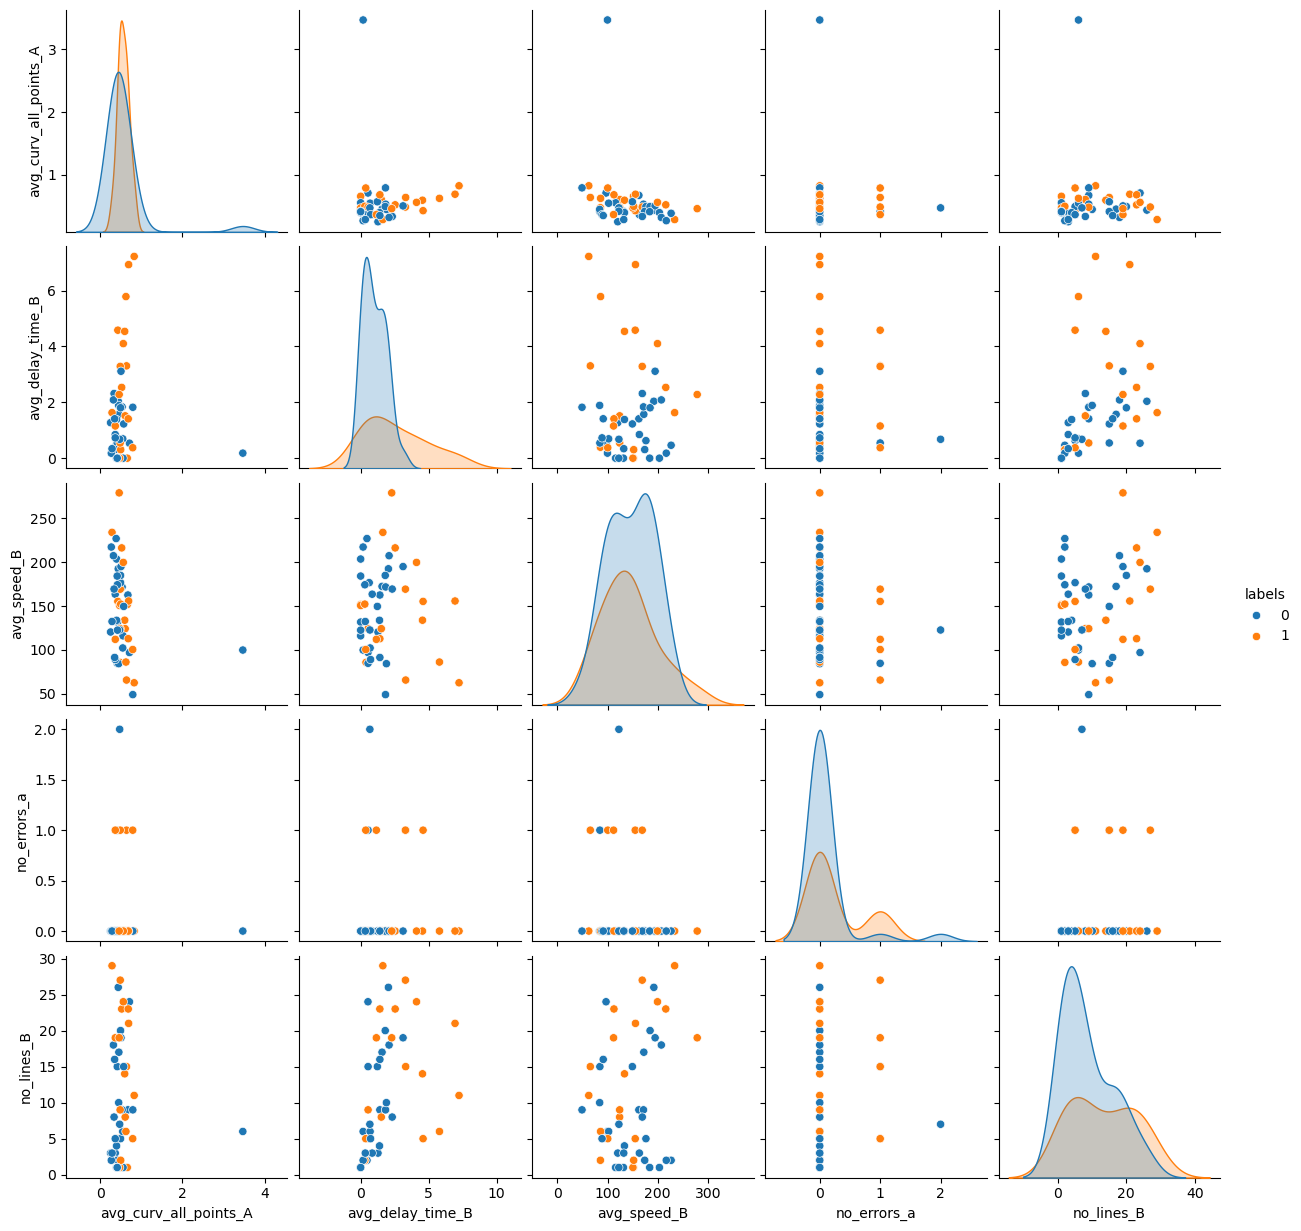

In [103]:
important_features_with_labels = [
    'avg_curv_all_points_A', 'avg_delay_time_B', 'avg_speed_B', 
    'no_errors_a', 'no_lines_B','labels'
]

# Pairplot for selected columns
sns.pairplot(data=df[important_features_with_labels], hue='labels', diag_kind='kde')
plt.show()

# Preprocessing
### *The following features were selected to be important to the model based on feature permutation*

In [104]:
# Select features and target
important_features = [
    'avg_curv_all_points_A', 'avg_delay_time_B', 'avg_speed_B', 
    'no_errors_a', 'no_lines_B'
]

knn_imp_features = [
    'avg_speed_B',  
    'no_lines_B',   
    'total_length_A',  
    'no_corners_A', 
    'no_corners_B'  
]

gb_imp_features = ['avg_delay_time_B','avg_force_B','avg_curv_A']

test =['avg_curv_all_points_A','avg_delay_time_B']

target = 'labels'

# Drop the target column from the dataset to create the feature set
X_full = df.drop(columns=[target])
X = X_full[important_features]
X_knn = X_full[knn_imp_features]
X_gb = X_full[gb_imp_features]

# Extract the target column
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state=42

# scale the data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
df.columns

Index(['patient_id', 'avg_point_time_A', 'avg_force_A', 'total_length_A',
       'no_points_A', 'avg_delay_time_A', 'no_corners_A', 'avg_curv_A',
       'duration_b', 'no_errors_a', 'no_errors_b', 'avg_point_time_B',
       'avg_force_B', 'total_length_B', 'no_lines_B', 'avg_delay_time_B',
       'avg_curv_B', 'no_corners_B', 'SSIM-A', 'SSIM-B', 'avg_speed_B',
       'avg_curv_all_points_A', 'labels'],
      dtype='object')

# Feature Permutation

In [106]:
all_importances = pd.DataFrame({'Feature': X_train.columns})

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "k-NN": KNeighborsClassifier()
}
for model_name, model in models.items():
    if model_name != 'k-NN':
        model.fit(X_train, y_train)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"{model_name} AUC: {auc:.4f}")
        # Perform permutation importance
        perm_importance = permutation_importance(model, X_test, y_test, scoring='roc_auc', random_state=42)
        
        # Add the feature importances to the DataFrame
        all_importances[model_name] = perm_importance.importances_mean

# Train k-NN
knn_model = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn_model.fit(X_train, y_train)

# Compute permutation importance
perm_importance_knn = permutation_importance(knn_model, X_test, y_test, scoring='roc_auc', random_state=42)

all_importances['k-NN'] = perm_importance_knn.importances_mean

# Sort the DataFrame by importance for one model (e.g., first model in the dictionary)
first_model_name = next(iter(models.keys()))
all_importances = all_importances.sort_values(by=first_model_name, ascending=False)

# Display the combined importances
all_importances



Random Forest AUC: 0.9545
Gradient Boosting AUC: 0.9455
Logistic Regression AUC: 0.7455
SVM AUC: 0.9091


,Feature,Random Forest,Gradient Boosting,Logistic Regression,SVM,k-NN
4,no_lines_B,0.178182,0.290909,-0.010909,0.145455,0.100000
0,avg_curv_all_points_A,0.170909,0.003636,0.109091,0.210909,0.192727
1,avg_delay_time_B,0.105455,0.105455,0.058182,0.160000,0.134545
2,avg_speed_B,0.045455,0.141818,0.007273,0.025455,0.174545
3,no_errors_a,0.018182,0.018182,0.025455,0.047273,0.025455


# Crossvalidation

In [107]:
# Evaluate models with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    print(f"{name} CV AUC: {scores.mean():.4f} ± {scores.std():.4f}")


Random Forest CV AUC: 0.7994 ± 0.0947
Gradient Boosting CV AUC: 0.7232 ± 0.0461
Logistic Regression CV AUC: 0.6786 ± 0.1943
SVM CV AUC: 0.6107 ± 0.2332
k-NN CV AUC: 0.5946 ± 0.0989


# Testing

In [108]:
# Initialize a list to store results
results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test)
    recall = recall_score(y_test, model.predict(X_test))
    precision = precision_score(y_test, model.predict(X_test))
    f1 = f1_score(y_test, model.predict(X_test))
    
    # Append results to the list
    results.append({
        "Model": name,
        "AUC": auc,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)
results_df



,Model,AUC,Accuracy,Recall,Precision,F1 Score
0,Random Forest,0.954545,0.8125,0.4,1.000000,0.571429
1,Gradient Boosting,0.945455,0.8125,0.4,1.000000,0.571429
2,Logistic Regression,0.745455,0.7500,0.4,0.666667,0.500000
3,SVM,0.909091,0.8125,0.4,1.000000,0.571429
4,k-NN,0.790909,0.7500,0.4,0.666667,0.500000


# Hyperparameter Tuning
Clearly Gradient Boosting and Random Forest are the best models for this problem, so lets do some hyperparamtertuning to further improve the score

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hyperparameter grid
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rs = RandomizedSearchCV(
    model, param_distributions, n_iter=50, cv=5, scoring='roc_auc', random_state=42, verbose=1
)

# Perform the search
rs.fit(X, y)

# Display the best parameters
print("Best Parameters:", rs.best_params_)

# Use the best model
best_model = rs.best_estimator_

# Cross-validate the best model
scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"CV AUC: {scores.mean():.4f} ± {scores.std():.4f}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 6}
CV AUC: 0.8036 ± 0.0974


Test AUC: 0.9636
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.40      0.57         5

    accuracy                           0.81        16
   macro avg       0.89      0.70      0.73        16
weighted avg       0.85      0.81      0.78        16



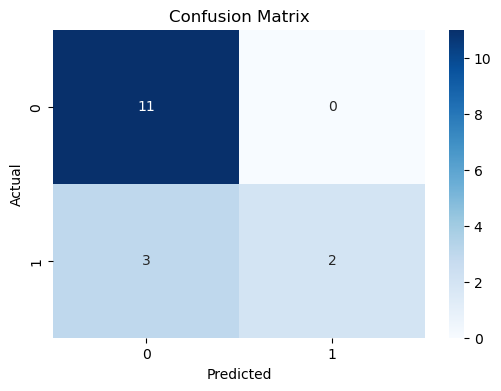

In [110]:
# Test the best model on the test set
best_model.fit(X_train, y_train)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test AUC: {auc:.4f}")

# Predict classes for confusion matrix and classification report
y_pred = best_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [111]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
gs = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', verbose=1)

# Perform the search
gs.fit(X, y)

# Display the best parameters and best score
print("Best Parameters:", gs.best_params_)
print("Best AUC Score:", gs.best_score_)

# Use the best model
best_model_gb = gs.best_estimator_

# Cross-validate the best model
scores = cross_val_score(best_model_gb, X, y, cv=5, scoring='roc_auc')
print(f"CV AUC: {scores.mean():.4f} ± {scores.std():.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Best AUC Score: 0.7678571428571429
CV AUC: 0.7679 ± 0.0409


Test AUC: 0.9636363636363636
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.00      0.00      0.00         5

    accuracy                           0.69        16
   macro avg       0.34      0.50      0.41        16
weighted avg       0.47      0.69      0.56        16



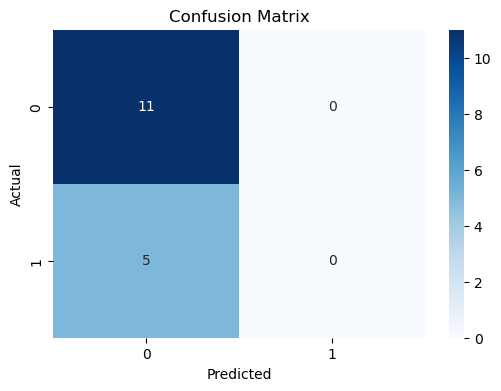

In [112]:
# Make predictions with the best model
y_pred_gb = best_model_gb.predict(X_test)
y_pred_proba_gb = best_model_gb.predict_proba(X_test)[:, 1]

# Evaluate on test data
print("Test AUC:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Conclusion

Random Forest demonstrated the best performance on this dataset based on cross-validated evaluation metrics. However, the small dataset size increases the risk of overfitting, even with cross-validation, making it challenging to ensure consistent and generalizable results.

Future improvements could include:
- Expanding the dataset to better capture variability.
- Enhancing feature engineering to improve predictive performance.

While Random Forest shows strong potential, the results should be interpreted cautiously due to the dataset's limitations.

